<a href="https://colab.research.google.com/github/RodrigoEslava/LBB-Competicao/blob/main/lbb_ml5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LBB 5 aprendizado de maquina**


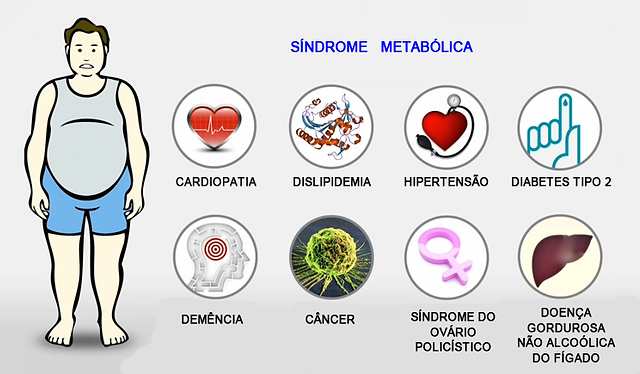

Fonte: https://bvsms.saude.gov.br/sindrome-metabolica/

A Síndrome Metabólica é uma condição médica complexa e multifacetada que envolve um conjunto de fatores de risco para doenças cardiovasculares e diabetes tipo 2. Esses fatores de risco incluem obesidade, resistência à insulina (incapacidade das células do corpo de usar a insulina de forma eficiente), níveis elevados de açúcar no sangue, hipertensão arterial e baixos níveis de colesterol HDL.

A Síndrome Metabólica está associada a um risco aumentado de doenças cardiovasculares, incluindo doença cardíaca e acidente vascular cerebral, bem como diabetes tipo 2. A síndrome pode ser prevenida ou tratada com mudanças no estilo de vida, como a prática regular de atividade física, alimentação saudável e perda de peso. Além disso, o tratamento pode envolver o controle dos fatores de risco, como a hipertensão arterial, o nível de açúcar no sangue e o colesterol. O diagnóstico da Síndrome Metabólica é baseado na presença de três ou mais fatores de risco mencionados acima.

Suponha que você foi contratado como cientista de dados em um hospital e recebeu um conjunto de dados contendo informações sobre pacientes admitidos no hospital que foram diagnosticados com Síndrome Metabólica. O conjunto de dados contém informações como idade, sexo, peso, exames laboratoriais, medicamentos prescritos, entre outros. Além disso, o conjunto de dados inclui uma coluna indicando se cada paciente foi ou não readmitido no hospital dentro de um período de tempo especificado.

Nao - O paciente não foi readmitido no hospital
+30 - O paciente foi readmitido após mais de 30 dias desde a última internação
-30 - O paciente foi readmitido após menos de 30 dias desde a última internação
Sua tarefa é construir um modelo de aprendizado de máquina capaz de prever se um paciente será readmitido no hospital ou não, com base em suas características. Para isso, você pode usar técnicas de pré-processamento de dados, como normalização e seleção de características, além de algoritmos de aprendizado de máquina, como árvores de decisão, máquina de suporte de vetores e redes neurais. Lembre-se de que a escolha do algoritmo depende do tipo de dado e do problema em questão.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics


import lightgbm as lgb
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Leitura dos datasets
train_df = pd.read_csv('train.csv')
validacao_df = pd.read_csv('test.csv')

train_df

,id,Genero,Idade,Peso,Raca,Fonte de admisscao,Admissao,Atendimento,Tempo de internacao,Alta hospitalar,...,Medicamento 17,Medicamento 18,Medicamento 19,Medicamento 20,Medicamento 21,Medicamento 22,Medicamento 23,Mudanca de medicamento,Algum medicamento,Readmissao
0,24080,Masculino,90,NaN,Caucasiano,NaN,NaN,NaN,3,Enfermaria,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,Nao
1,98080,Masculino,60,NaN,Caucasiano,Emergencia,Emergencia,Clinica Medica/Familiar,7,Tratamento domiciliar,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim,+30
2,6238,Masculino,70,NaN,Afroamericano,Emergencia,Emergencia,NaN,5,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao,+30
3,72209,Feminino,60,NaN,Caucasiano,Transferencia de hospital,Urgencia,Cardiologia,3,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,Nao
4,33076,Feminino,40,NaN,Caucasiano,Emergencia,Emergencia,NaN,4,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao,+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,6266,Feminino,60,NaN,Caucasiano,Emergencia,NaN,Medicina Interna,11,-,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,+30
81408,54887,Feminino,70,NaN,Caucasiano,Encaminhamento medico,Emergencia,Clinica Medica/Familiar,4,Enfermaria,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,-30
81409,76821,Masculino,70,NaN,Caucasiano,Emergencia,Urgencia,Clinica Medica/Familiar,5,Casa,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,+30
81410,861,Masculino,60,NaN,Afroamericano,Encaminhamento medico,Urgencia,Cirurgia-Vascular,6,Enfermaria,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim,+30


In [ ]:
train_df.dtypes

id                              int64
Genero                         object
Idade                           int64
Peso                          float64
Raca                           object
Fonte de admisscao             object
Admissao                       object
Atendimento                    object
Tempo de internacao             int64
Alta hospitalar                object
Qtd. Exames de laboratorio      int64
Outros exames                   int64
Numero de diagnosticos          int64
Diagnostico 1 (id)             object
Diagnostico 2 (id)             object
Diagnostico 3 (id)             object
Exame 1                        object
Exame 2                        object
Numero de medicamentos          int64
Medicamento 1                  object
Medicamento 2                  object
Medicamento 3                  object
Medicamento 4                  object
Medicamento 5                  object
Medicamento 6                  object
Medicamento 7                  object
Medicamento 

In [ ]:
train_df.describe()

,id,Idade,Peso,Tempo de internacao,Qtd. Exames de laboratorio,Outros exames,Numero de diagnosticos,Numero de medicamentos
count,81412.000000,81412.000000,2581.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000
mean,50937.439284,60.978725,73.760170,4.390692,43.103437,1.339631,7.421056,16.014543
std,29412.013875,15.927826,25.958618,2.980581,19.670371,1.705142,1.933478,8.126308
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,25460.500000,50.000000,50.000000,2.000000,31.000000,0.000000,6.000000,10.000000
50%,50963.000000,60.000000,75.000000,4.000000,44.000000,1.000000,8.000000,15.000000
75%,76423.250000,70.000000,100.000000,6.000000,57.000000,2.000000,9.000000,20.000000
max,101765.000000,90.000000,200.000000,14.000000,132.000000,6.000000,16.000000,81.000000


In [ ]:
validacao_df

,id,Genero,Idade,Peso,Raca,Fonte de admisscao,Admissao,Atendimento,Tempo de internacao,Alta hospitalar,...,Medicamento 16,Medicamento 17,Medicamento 18,Medicamento 19,Medicamento 20,Medicamento 21,Medicamento 22,Medicamento 23,Mudanca de medicamento,Algum medicamento
0,35957,Masculino,80,NaN,Caucasiano,Emergencia,Emergencia,Emergencia/Trauma,4,Tratamento domiciliar,...,Dose aumentada,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
1,60928,Feminino,30,NaN,Caucasiano,Emergencia,Emergencia,NaN,13,Casa,...,Dose reduzida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
2,79921,Feminino,50,NaN,Afroamericano,Encaminhamento medico,Eletivo,NaN,9,Tratamento domiciliar,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
3,50079,Feminino,40,NaN,Afroamericano,Emergencia,Emergencia,NaN,7,Casa,...,Dose reduzida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
4,44081,Feminino,40,NaN,Caucasiano,Emergencia,Emergencia,Clinica Medica/Familiar,3,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20349,16157,Masculino,70,NaN,Afroamericano,Transferencia de hospital,Eletivo,Cardiologia,2,Casa,...,Nao prescrito,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim
20350,67387,Feminino,70,NaN,Caucasiano,Emergencia,Emergencia,NaN,1,Outro hospital,...,Dose reduzida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
20351,81343,Feminino,50,NaN,NaN,Encaminhamento medico,Urgencia,Nefrologia,6,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim
20352,72916,Feminino,50,NaN,Caucasiano,Emergencia,NaN,NaN,6,Tratamento domiciliar,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim


In [ ]:
validacao_df.dtypes

id                              int64
Genero                         object
Idade                           int64
Peso                          float64
Raca                           object
Fonte de admisscao             object
Admissao                       object
Atendimento                    object
Tempo de internacao             int64
Alta hospitalar                object
Qtd. Exames de laboratorio      int64
Outros exames                   int64
Numero de diagnosticos          int64
Diagnostico 1 (id)             object
Diagnostico 2 (id)             object
Diagnostico 3 (id)             object
Exame 1                        object
Exame 2                        object
Numero de medicamentos          int64
Medicamento 1                  object
Medicamento 2                  object
Medicamento 3                  object
Medicamento 4                  object
Medicamento 5                  object
Medicamento 6                  object
Medicamento 7                  object
Medicamento 

In [ ]:
validacao_df.describe()

,id,Idade,Peso,Tempo de internacao,Qtd. Exames de laboratorio,Outros exames,Numero de diagnosticos,Numero de medicamentos
count,20354.000000,20354.000000,616.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000
mean,50667.753464,60.920212,73.863636,4.417166,43.064459,1.340130,7.428810,16.051046
std,29238.558329,15.993084,26.647489,3.003125,19.690769,1.708506,1.934125,8.132730
min,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,25375.250000,50.000000,50.000000,2.000000,32.000000,0.000000,6.000000,10.000000
50%,50552.000000,60.000000,75.000000,4.000000,44.000000,1.000000,8.000000,15.000000
75%,76020.000000,70.000000,100.000000,6.000000,57.000000,2.000000,9.000000,20.000000
max,101766.000000,90.000000,175.000000,14.000000,120.000000,6.000000,16.000000,75.000000


In [ ]:
# Separating the values ​​of X and y
X = train_df[train_df.columns[1:44]]
y = train_df[train_df.columns[44:45]]

In [ ]:
X

,Genero,Idade,Peso,Raca,Fonte de admisscao,Admissao,Atendimento,Tempo de internacao,Alta hospitalar,Qtd. Exames de laboratorio,...,Medicamento 16,Medicamento 17,Medicamento 18,Medicamento 19,Medicamento 20,Medicamento 21,Medicamento 22,Medicamento 23,Mudanca de medicamento,Algum medicamento
0,Masculino,90,NaN,Caucasiano,NaN,NaN,NaN,3,Enfermaria,25,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
3,Feminino,60,NaN,Caucasiano,Transferencia de hospital,Urgencia,Cardiologia,3,Casa,38,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
5,Masculino,60,NaN,Caucasiano,Transferencia de hospital,Urgencia,NaN,7,Tratamento domiciliar,65,...,Dose aumentada,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
6,Feminino,50,NaN,Caucasiano,Emergencia,Emergencia,Clinica Medica/Familiar,4,Casa,48,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao
8,Masculino,40,NaN,Caucasiano,Emergencia,Emergencia,Medicina Interna,2,Alta sem recomendacao medica,57,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81403,Masculino,60,100.0,Caucasiano,Emergencia,Emergencia,Cirurgia-Geral,6,Casa,79,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
81404,Feminino,40,NaN,Afroamericano,Encaminhamento medico,Eletivo,Medicina Interna,1,Casa,28,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao
81405,Feminino,40,NaN,Caucasiano,Emergencia,Emergencia,Clinica Medica/Familiar,1,Casa,10,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim
81408,Feminino,70,NaN,Caucasiano,Encaminhamento medico,Emergencia,Clinica Medica/Familiar,4,Enfermaria,52,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim


In [ ]:
#Teste sem algumas colunas Spoiler: Melhor utilizar todas as colnas, os resultados não melhoraram ao retirar colunas 
cols_to_drop= [col for col in X.columns if col.startswith('Medicamento') and col.split()[1].isdigit() and int(col.split()[1]) <= 23]
X = X.drop(cols_to_drop, axis=1)
X = X.drop(["Raca", "Fonte de admisscao",'Genero',
 'Admissao',
 'Atendimento',
 'Alta hospitalar',
 'Diagnostico 1 (id)',
 'Diagnostico 2 (id)',
 'Diagnostico 3 (id)',
 'Exame 1',
 'Exame 2',
 'Mudanca de medicamento',
 'Algum medicamento'], axis=1)
X

,Idade,Peso,Tempo de internacao,Qtd. Exames de laboratorio,Outros exames,Numero de diagnosticos,Numero de medicamentos
0,90,NaN,3,25,0,9,8
1,60,NaN,7,46,2,5,24
2,70,NaN,5,35,1,5,15
3,60,NaN,3,38,3,4,7
4,40,NaN,4,43,2,9,16
...,...,...,...,...,...,...,...
81407,60,NaN,11,67,3,9,26
81408,70,NaN,4,52,0,6,9
81409,70,NaN,5,47,0,9,15
81410,60,NaN,6,43,3,8,27


In [ ]:
X.isna().sum()

Idade                             0
Peso                          78831
Tempo de internacao               0
Qtd. Exames de laboratorio        0
Outros exames                     0
Numero de diagnosticos            0
Numero de medicamentos            0
dtype: int64

In [ ]:
y.value_counts()

Readmissao
Nao           43944
+30           28425
dtype: int64

In [ ]:

# Dicionário para mapear strings para inteiros
mapping = {'Nao': 0, '+30': 1, '-30': 2}

# Aplica o mapeamento para substituir as strings por inteiros na coluna 'Readmissao'
y['Readmissao'] = y['Readmissao'].replace(mapping)


In [ ]:
y

,Readmissao
0,0
1,1
2,1
3,0
4,1
...,...
81405,0
81406,1
81407,1
81409,1


In [ ]:
# Separating the training data and test data stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#separar variaveis categoricas
variaveis_categoricas = [coluna for coluna in X_train.columns if X_train[coluna].dtype.name=='object']
variaveis_categoricas

['Genero',
 'Raca',
 'Fonte de admisscao',
 'Admissao',
 'Atendimento',
 'Alta hospitalar',
 'Diagnostico 1 (id)',
 'Diagnostico 2 (id)',
 'Diagnostico 3 (id)',
 'Exame 1',
 'Exame 2',
 'Medicamento 1',
 'Medicamento 2',
 'Medicamento 3',
 'Medicamento 4',
 'Medicamento 5',
 'Medicamento 6',
 'Medicamento 7',
 'Medicamento 8',
 'Medicamento 9',
 'Medicamento 10',
 'Medicamento 11',
 'Medicamento 12',
 'Medicamento 13',
 'Medicamento 14',
 'Medicamento 15',
 'Medicamento 16',
 'Medicamento 17',
 'Medicamento 18',
 'Medicamento 19',
 'Medicamento 20',
 'Medicamento 21',
 'Medicamento 22',
 'Medicamento 23',
 'Mudanca de medicamento',
 'Algum medicamento']

In [ ]:
#separar variaveis numericas
variaveis_numericas = [coluna for coluna in X_train.columns if coluna not in variaveis_categoricas]
variaveis_numericas

['Idade',
 'Peso',
 'Tempo de internacao',
 'Qtd. Exames de laboratorio',
 'Outros exames',
 'Numero de diagnosticos',
 'Numero de medicamentos']

In [ ]:
#separando tratamento para colunas categoricas (imputer = tratar dados faltantes)
pipeline_categoricas = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="missing")), ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))])

In [ ]:
#tratamento para numericas
pipeline_numericas = Pipeline([('imputer',SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())])

In [ ]:
#concatenar os tratamentos
pre_processamento = ColumnTransformer([('categorica', pipeline_categoricas, variaveis_categoricas), ("numerica", pipeline_numericas, variaveis_numericas)])

In [ ]:
pre_processamento

ColumnTransformer(transformers=[('categorica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Genero', 'Raca', 'Fonte de admisscao',
                                  'Admissao', 'Atendimento', 'Alta hospitalar',
                                  'Diagnostico 1 (id)', 'Diagnostico 2 (id)',
                                  'Diagnostico 3 (id)', 'Exame 1', 'Exame 2',
                                  '...
                                  'Medicamento 11', 'Medicamento 12',
                                  'Medicamento 13', 'Medicamento 14',
                                  'Medicamento 15', 'Medicamento 16',
                                  'Medicamento 17', 'Medicamento 18',
                                  'Medicamento 19', ...]),
                                ('numerica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Idade', 'Peso', 'Tempo de internacao',
                                  'Qtd. Exames de laboratorio', 'Outros exames',
                                  'Numero de diagnosticos',
                                  'Numero de medicamentos'])])

# **PCA test**

In [ ]:
# Separating the training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)
#separar variaveis categoricas
variaveis_categoricas = [coluna for coluna in X_train.columns if X_train[coluna].dtype.name=='object']
variaveis_categoricas

#separando tratamento para colunas categoricas (imputer = tratar dados faltantes)
pipeline_categoricas = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="missing")), ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False)),  ("pca", PCA(n_components=5)   )])


from sklearn.decomposition import PCA

# selecionando as variáveis numéricas
variaveis_numericas = [coluna for coluna in X_train.columns if X_train[coluna].dtype.name != 'object']

# pipeline para variáveis numéricas
pipeline_numericas = Pipeline([('imputer',SimpleImputer(strategy="median")), ("scaler", MinMaxScaler()), ('pca', PCA(n_components=3))])

# concatenando os tratamentos
pre_processamento = ColumnTransformer([('categorica', pipeline_categoricas, variaveis_categoricas), ("numerica", pipeline_numericas, variaveis_numericas)])

# aplicação modelo
pipeline_lgb = make_pipeline(pre_processamento, lgb.LGBMClassifier())

pipeline_lgb.fit(X_train, y_train)
pipeline_lgb.score(X_test, y_test)


0.5462659679004258

# treinando modelos


In [ ]:

 
pipeline_lgb = make_pipeline(pre_processamento, lgb.LGBMClassifier() )
#pipeline_xgb = make_pipeline(pre_processamento, xgb.XGBClassifier() )

#pipeline_random_forest = make_pipeline(pre_processamento, RandomForestClassifier() )


#pipeline_lgb = make_pipeline(pre_processamento, lgb.LGBMClassifier(boosting_type ='gbdt', objective = "binary", num_boost_round=100, max_bin= 100, max_depth= 100, num_leaves= 100, learning_rate= .9, boost_from_average = True, feature_fraction =  .1) )

In [ ]:
# Fazer todo o precessamento, treinar o modelo na base de treino
# e fazer o score predizendo na base de validação

pipeline_lgb.fit(X_train, y_train)
pipeline_lgb.score(X_test, y_test)
                   


0.6395836212058403

In [ ]:
from sklearn.metrics import f1_score

# Obter as previsões do modelo usando o conjunto de teste
y_pred = pipeline_lgb.predict(X_test)

# Avaliar a performance do modelo usando f1_score
f1 = f1_score(y_test, y_pred, average="macro")


In [ ]:
f1

0.5797187134614104

# **validacao**

In [ ]:
#separando o X da validação

X_validacao = validacao_df[validacao_df.columns[1:]]

X_validacao

,Genero,Idade,Peso,Raca,Fonte de admisscao,Admissao,Atendimento,Tempo de internacao,Alta hospitalar,Qtd. Exames de laboratorio,...,Medicamento 16,Medicamento 17,Medicamento 18,Medicamento 19,Medicamento 20,Medicamento 21,Medicamento 22,Medicamento 23,Mudanca de medicamento,Algum medicamento
0,Masculino,80,NaN,Caucasiano,Emergencia,Emergencia,Emergencia/Trauma,4,Tratamento domiciliar,58,...,Dose aumentada,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
1,Feminino,30,NaN,Caucasiano,Emergencia,Emergencia,NaN,13,Casa,99,...,Dose reduzida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
2,Feminino,50,NaN,Afroamericano,Encaminhamento medico,Eletivo,NaN,9,Tratamento domiciliar,37,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
3,Feminino,40,NaN,Afroamericano,Emergencia,Emergencia,NaN,7,Casa,36,...,Dose reduzida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
4,Feminino,40,NaN,Caucasiano,Emergencia,Emergencia,Clinica Medica/Familiar,3,Casa,46,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20349,Masculino,70,NaN,Afroamericano,Transferencia de hospital,Eletivo,Cardiologia,2,Casa,38,...,Nao prescrito,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim
20350,Feminino,70,NaN,Caucasiano,Emergencia,Emergencia,NaN,1,Outro hospital,38,...,Dose reduzida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim
20351,Feminino,50,NaN,NaN,Encaminhamento medico,Urgencia,Nefrologia,6,Casa,53,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim
20352,Feminino,50,NaN,Caucasiano,Emergencia,NaN,NaN,6,Tratamento domiciliar,36,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim


In [ ]:
pred_validacao = pipeline_lgb.predict(X_validacao)

In [ ]:
pred_validacao = pd.DataFrame(pred_validacao)
pred_validacao

,0
0,1
1,0
2,0
3,1
4,0
...,...
20349,0
20350,1
20351,0
20352,1


In [ ]:

# Dicionário para mapear strings para inteiros
mapping = { 0 :'Nao', 1 :'+30', 2 : '-30'}

# Aplica o mapeamento para substituir as strings por inteiros na coluna 'Readmissao'
pred_validacao[0] = pred_validacao[0].replace(mapping)

pred_validacao

,0
0,+30
1,Nao
2,Nao
3,+30
4,Nao
...,...
20349,Nao
20350,+30
20351,Nao
20352,+30


In [ ]:
# Save final results

#creating predicted gene column

ids = list()
ids = pd.DataFrame(ids)
ids['id'] = validacao_df["id"]

In [ ]:
final_result = list()
final_result = pd.DataFrame(final_result)
final_result = pd.concat([ids, pred_validacao], axis=1)

In [ ]:
final_result.columns = ['id'] + ['classe']
final_result

,id,classe
0,35957,+30
1,60928,Nao
2,79921,Nao
3,50079,+30
4,44081,Nao
...,...,...
20349,16157,Nao
20350,67387,+30
20351,81343,Nao
20352,72916,+30


In [ ]:
# Save final rresult
final_result.to_csv("pred_readimissao33.txt", sep = " " , index=None)

# **Deep learning**

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer


#Leitura dos datasets
df = pd.read_csv('train.csv')
validacao_df = pd.read_csv('test.csv')

# Separating the values ​​of X and y
X = df[df.columns[1:44]]
y = df[df.columns[44:45]]

In [ ]:
# Dicionário para mapear strings para inteiros
mapping = {'Nao': 0, '+30': 1, '-30': 2}

# Aplica o mapeamento para substituir as strings por inteiros na coluna 'Readmissao'
y['Readmissao'] = y['Readmissao'].replace(mapping)

In [ ]:
# Separating the training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 7, stratify = y)

#separar variaveis categoricas
variaveis_categoricas = [coluna for coluna in X_train.columns if X_train[coluna].dtype.name=='object']

#separar variaveis numericas
variaveis_numericas = [coluna for coluna in X_train.columns if coluna not in variaveis_categoricas]

#separando tratamento para colunas categoricas (imputer = tratar dados faltantes)
pipeline_categoricas = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="missing")), ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))])

#tratamento para numericas
pipeline_numericas = Pipeline([('imputer',SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())])

#concatenar os tratamentos
pre_processamento = ColumnTransformer([('categorica', pipeline_categoricas, variaveis_categoricas), ("numerica", pipeline_numericas, variaveis_numericas)])

In [ ]:
# Defina o modelo de classificação
mlp = MLPClassifier(hidden_layer_sizes=(30,), activation='logistic', solver='adam', max_iter=500, alpha=0.01,learning_rate='adaptive' )

# Crie um pipeline que combine as transformações e o modelo
pipeline = Pipeline(steps=[
    ('preprocessor',pre_processamento),
    ('classifier', mlp)
])

# Ajuste o pipeline aos dados de treinamento
pipeline.fit(X_train, y_train.values.ravel())

# Faça previsões para os dados de teste e avalie a precisão e o F1-score do modelo
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1-score:', f1)

In [ ]:
#separando o X da validação

X_validacao = validacao_df[validacao_df.columns[1:]]
X_validacao

In [ ]:
pred_validacao = pipeline.predict(X_validacao)

In [ ]:
pred_validacao = pd.DataFrame(pred_validacao)
pred_validacao

In [ ]:

# Dicionário para mapear strings para inteiros
mapping = { 0 :'Nao', 1 :'+30', 2 : '-30'}

# Aplica o mapeamento para substituir as strings por inteiros na coluna 'Readmissao'
pred_validacao[0] = pred_validacao[0].replace(mapping)

pred_validacao

In [ ]:
# Save final results

#creating predicted gene column

ids = list()
ids = pd.DataFrame(ids)
ids['id'] = validacao_df["id"]

In [ ]:
final_result = list()
final_result = pd.DataFrame(final_result)
final_result = pd.concat([ids, pred_validacao], axis=1)

In [ ]:
# Save final rresult
final_result.to_csv("pred_readimissao19.txt", sep = " ", index=None)